In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
np.random.seed(0)

import sys
import os
sys.path.insert(0,'..')

from util import read_data_in_dense_matrix, eval_prediction, store_dense_matrix_to_submission
from baselines import impute_by_nuclear_relaxation

data_dir = '../../data/'

/local/home/yuhmao/miniconda3/envs/SCT/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
(train_matrix, test_matrix), (is_train, is_test) = read_data_in_dense_matrix(os.path.join(data_dir, 'data_train.csv'), n_col=1000, n_row=10000, test_size=0.2)

In [4]:
for reg in [3.3, 3.5, 3.7, 3.9]:
    prediction = impute_by_nuclear_relaxation(train_matrix, is_train, iters=200, nuclear_reg=reg, start_from=None)
    train_rmse, test_rmse = eval_prediction(prediction, train_matrix, is_train), eval_prediction(prediction, test_matrix, is_test)
    print(f"Train RMSE: {train_rmse:.4f}, Test RMSE: {test_rmse:.4f}")

Train RMSE: 0.7945, Test RMSE: 0.9888
Train RMSE: 0.8243, Test RMSE: 0.9886
Train RMSE: 0.8514, Test RMSE: 0.9886
Train RMSE: 0.8758, Test RMSE: 0.9889


In [ ]:
rmse_dict = {}
reg = 3.5
for iter in range(300):
    if iter == 0:
        prediction = impute_by_nuclear_relaxation(train_matrix, is_train, iters=1, nuclear_reg=reg, start_from=None)
    else:
        prediction = impute_by_nuclear_relaxation(train_matrix, is_train, iters=1, nuclear_reg=reg, start_from=prediction)
    rmse = eval_prediction(prediction, test_matrix, is_test)
    rmse_dict[iter] = rmse

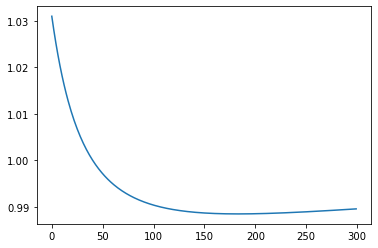

In [ ]:
plt.plot(list(rmse_dict.values()))
plt.show()

In [ ]:
best_iter = np.array(list(rmse_dict.values())).argmin()
best_iter

183

In [ ]:
data_matrix, is_provided = read_data_in_dense_matrix(os.path.join(data_dir, 'data_train.csv'), n_col=1000, n_row=10000, test_size=None)
prediction = impute_by_nuclear_relaxation(data_matrix, is_provided, iters=best_iter, nuclear_reg=reg, start_from=None)
store_dense_matrix_to_submission(os.path.join(data_dir, 'sampleSubmission.csv'), os.path.join(data_dir, 'mysub.csv'), prediction)


Loading requests specified by submission samples...
Storing 1176952 records for submission as requested...
